In [41]:
from scipy.io import loadmat
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [6]:
?loadmat

In [7]:
data = loadmat("/Users/nehamangal/ml-coursera-python-assignments/Exercise3/Data/ex3data1.mat")

In [18]:
X, y = data['X'], data['y'].ravel()

In [17]:
print(data['y'].shape)
print(data['y'].ravel().shape)  #flattens the array
print(data['X'].shape)
print(data['X'].ravel().shape)  #flattens the array

#400 features in a single sample unit (400 columns); sample size = 5000

(5000, 1)
(5000,)
(5000, 400)
(2000000,)


In [32]:
np.unique(y) #outputs [1,2,3,..,10]

#distint digits are mapped to y = 1 to 10; 
#note that digit 0 is mapped as y = 10 so, we need to relabel 10 as 0

y[y==10] = 0

In [33]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [35]:
print(y.size)
m = y.size  #number of training samples

5000


In [36]:
#input layer 20 X 20 pixel Images input
input_layer_size = 400

#number of output classes = 10
number_labels = 10

In [56]:
?np.random.choice

In [62]:
X_ex = X[np.random.choice(m, 100, replace = False), :]
X_ex.shape

(100, 400)

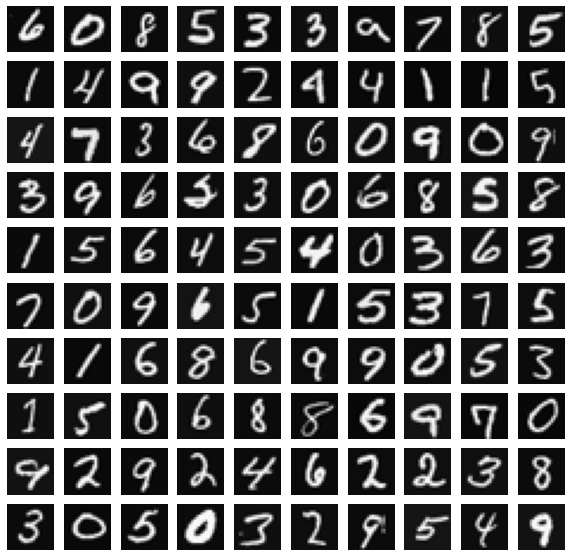

In [64]:

fig, ax_array = pyplot.subplots(10, 10, figsize=(10,10))

ax_array = ax_array.ravel()

for i, ax in enumerate(ax_array):
    ax.imshow(X_ex[i].reshape(20,20, order = "F"),cmap = 'gray')
    ax.axis('off')


Since there are 10 classes, we will need to train 10 separate logistic regression classifiers.To make this training efficient, it is important to ensure that our code is well vectorized.

In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Computes the cost of using theta as the parameter for regularized
    logistic regression and the gradient of the cost w.r.t. to the parameters.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept.  
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (including intercept).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta
    
    Hint 1
    ------
    The computation of the cost function and gradients can be efficiently
    vectorized. For example, consider the computation
    
        sigmoid(X * theta)
    
    Each row of the resulting matrix will contain the value of the prediction
    for that example. You can make use of this to vectorize the cost function
    and gradient computations. 
    
    Hint 2
    ------
    When computing the gradient of the regularized cost function, there are
    many possible vectorized solutions, but one solution looks like:
    
        grad = (unregularized gradient for logistic regression)
        temp = theta 
        temp[0] = 0   # because we don't add anything for j = 0
        grad = grad + YOUR_CODE_HERE (using the temp variable)
    
    Hint 3
    ------
    We have provided the implementatation of the sigmoid function within 
    the file `utils.py`. At the start of the notebook, we imported this file
    as a module. Thus to access the sigmoid function within that file, you can
    do the following: `utils.sigmoid(z)`.
    
    """
    #Initialize some useful values
    m = y.size
    
    # convert labels to ints if their type is bool
    if y.dtype == bool:
        y = y.astype(int)
    
    # You need to return the following variables correctly
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    theta = theta.copy()
    z = np.matmul(X, theta)
    h_theta = utils.sigmoid(z)
    grad = grad + (1/m)*np.matmul(X.T, (h_theta-y))
    J = np.matmul()


        
    # =============================================================
    return J, grad